In [2]:
import pandas as pd
import urllib2
import json

In [57]:
import urllib2
from xml.etree import ElementTree as ET

def get_xml(url):
    return ET.parse(urllib2.urlopen(url)).getroot()

,State,State_Ab,County,Lat_Long


In [75]:
def xml_to_pandas(df, root):
    columns = {'State': [], 'State_Ab': [], 'County': [], 'Latitude': [], 'Longitude': []}
    for child in root:
        for nef in child:
            if nef.tag == 'name': 
                columns['County'].append(nef.text.replace(' County', ''))
            if nef.tag == 'state_abbreviation':
                columns['State_Ab'].append(nef.text)
            if nef.tag == 'state_name':
                columns['State'].append(nef.text.lower())
            if nef.tag == 'primary_latitude':
                columns['Latitude'].append(nef.text)
            if nef.tag == 'primary_longitude':
                columns['Longitude'].append(nef.text)
    df_temp = pd.DataFrame(columns)
    df_temp
    return df.append(df_temp)

In [76]:
state_ab = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]

In [77]:
df = pd.DataFrame(columns=['State', 'State_Ab', 'County', 'Latitude', 'Longitude'])

In [78]:
for ab in state_ab:
    ab = ab.lower()
    print ab
    url_root = "http://api.sba.gov/geodata/county_links_for_state_of/{}.xml".format(ab)
    root = get_xml(url_root)
    df = xml_to_pandas(df, root)
    df.to_csv('county_loc.csv')

In [74]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


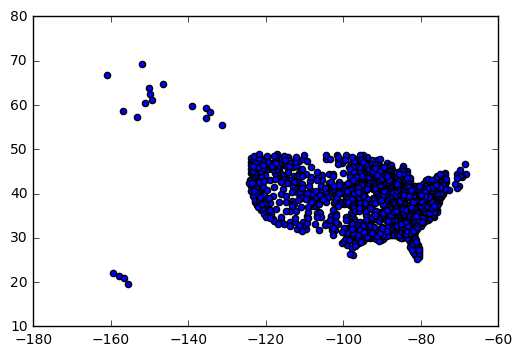

In [79]:
df = pd.read_csv('county_loc.csv')
df[['Latitude', 'Longitude']]
plt.scatter(df['Longitude'], df['Latitude'], marker='o')

In [82]:
df[df['State'] == 'texas']

,Unnamed: 0,County,Latitude,Longitude,State,State_Ab
1370,0,Calhoun,28.46,-96.61,texas,TX
1371,1,Cameron,26.11,-97.51,texas,TX
1372,2,Chambers,29.73,-94.65,texas,TX
1373,3,Clay,33.76,-98.21,texas,TX
1374,4,Collin,33.20,-96.56,texas,TX
1375,5,Colorado,29.61,-96.53,texas,TX
1376,6,Comal,29.81,-98.30,texas,TX
1377,7,Cooke,33.63,-97.21,texas,TX
1378,8,Dallam,36.28,-102.60,texas,TX
1379,9,Dallas,32.76,-96.78,texas,TX
